<a href="https://colab.research.google.com/github/jescalada/Tensorflow-colabs/blob/main/computer_vision_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks and Computer Vision
Computer vision can be achieved by writing algorithms that find patterns in visual data.

# Get some data
The data is from Food101 dataset, but it was modified to use two classes.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-05-20 01:13:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.172.128, 142.251.171.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.172.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   201MB/s    in 0.5s    

2023-05-20 01:13:47 (201 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


In [3]:
# Count images in directory
print(len(os.listdir("pizza_steak/train/steak")))

750


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (384, 512, 3)


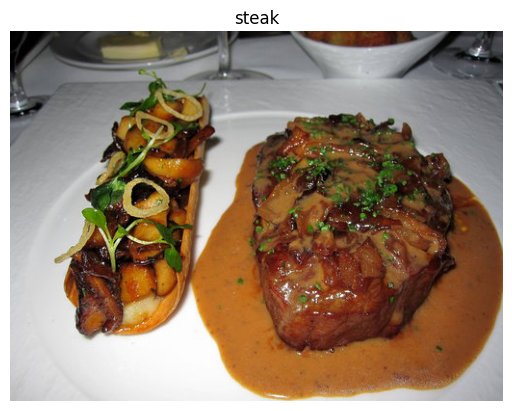

In [5]:
img = view_random_image(target_dir='pizza_steak/train/',
                  target_class='steak')

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn into batches of augmented data
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN (same as Tiny VGG)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 183s 4s/step - loss: 0.5994 - accuracy: 0.6853 - val_loss: 0.5002 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 148s 3s/step - loss: 0.4724 - accuracy: 0.7813 - val_loss: 0.3876 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 144s 3s/step - loss: 0.4192 - accuracy: 0.8020 - val_loss: 0.3770 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 138s 3s/step - loss: 0.4059 - accuracy: 0.8233 - val_loss: 0.3413 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 144s 3s/step - loss: 0.3670 - accuracy: 0.8400 - val_loss: 0.3818 - val_accuracy: 0.8360


# Attempting to use a non-convolutional neural network to fit the data
It sucks

In [7]:
tf.random.set_seed(42)

non_cnn_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

non_cnn_model.compile(loss="binary_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

non_cnn_model.fit(train_data,
                  epochs=5,
                  steps_per_epoch=len(train_data),
                  validation_data=valid_data,
                  validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 27s 558ms/step - loss: 3.5236 - accuracy: 0.6133 - val_loss: 0.7430 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 23s 490ms/step - loss: 1.3238 - accuracy: 0.6493 - val_loss: 2.1940 - val_accuracy: 0.6700
Epoch 3/5
47/47 [==============================] - 25s 531ms/step - loss: 0.7487 - accuracy: 0.7367 - val_loss: 0.5558 - val_accuracy: 0.7400
Epoch 4/5
47/47 [==============================] - 26s 549ms/step - loss: 0.6102 - accuracy: 0.7547 - val_loss: 0.4771 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 25s 519ms/step - loss: 0.6102 - accuracy: 0.7493 - val_loss: 0.7243 - val_accuracy: 0.6460


In [8]:
non_cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


# Binary Classification
1. Visualize the data
2. Preprocess the data (prepare for the model, scale, normalize)
3. Create model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters to improve the model

## 1. Visualize the data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


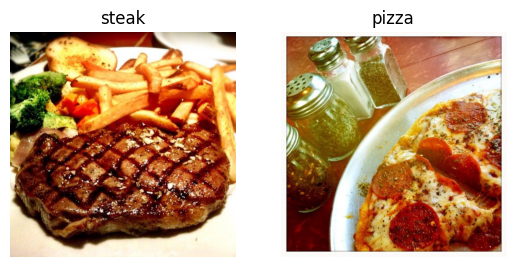

In [9]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)

steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

## 2. Preprocess the data

In [10]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


Turn data into batches of 32, so that it's easier to process the images with the GPU, and prevents overfitting.

In [11]:
# Create training and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [12]:
# Load in the image data from the directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
# Get a sample of a training data batch
images, labels = train_data.next() # Get the next batch of images and labels in train data
len(images), len(labels)


(32, 32)

In [14]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.1137255 , 0.11764707, 0.18823531],
          [0.1137255 , 0.11764707, 0.18823531],
          [0.10980393, 0.1137255 , 0.18431373],
          ...,
          [0.95294124, 0.9450981 , 0.9490197 ],
          [0.8235295 , 0.81568635, 0.8196079 ],
          [0.97647065, 0.9686275 , 0.9725491 ]],
 
         [[0.12156864, 0.1254902 , 0.19607845],
          [0.1254902 , 0.12941177, 0.20000002],
          [0.10196079, 0.10588236, 0.1764706 ],
          ...,
          [0.9333334 , 0.92549026, 0.9294118 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [0.9960785 , 0.98823535, 0.9921569 ]],
 
         [[0.09803922, 0.10196079, 0.17254902],
          [0.10588236, 0.10980393, 0.18039216],
          [0.1254902 , 0.13333334, 0.19215688],
          ...,
          [0.8000001 , 0.79215693, 0.7960785 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [1.        , 0.9960785 , 1.        ]],
 
         ...,
 
         [[0.09803922, 0.07843138, 0.09411766],
          [0.07843

## 3. Create a CNN model (baseline)
Make a relatively simple model to start off with the machine learning experiment.

In [15]:
# Simplify the model creation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create a baseline
model_baseline = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [16]:
# Compile
model_baseline.compile(loss="binary_crossentropy",
                       optimizer=Adam(),
                       metrics=["accuracy"])
model_baseline.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_5 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## 4. Fit the model

In [17]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [18]:
# Fit
history_baseline = model_baseline.fit(train_data,
                                      epochs=5,
                                      steps_per_epoch=len(train_data),
                                      validation_data=test_data,
                                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 163s 3s/step - loss: 0.9439 - accuracy: 0.5993 - val_loss: 0.5591 - val_accuracy: 0.7160
Epoch 2/5
47/47 [==============================] - 182s 4s/step - loss: 0.5111 - accuracy: 0.7440 - val_loss: 0.4655 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 156s 3s/step - loss: 0.4121 - accuracy: 0.8107 - val_loss: 0.4164 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 160s 3s/step - loss: 0.2766 - accuracy: 0.9053 - val_loss: 0.4102 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 157s 3s/step - loss: 0.1475 - accuracy: 0.9600 - val_loss: 0.4494 - val_accuracy: 0.7900


## 5. Evaluating the model

<Axes: >

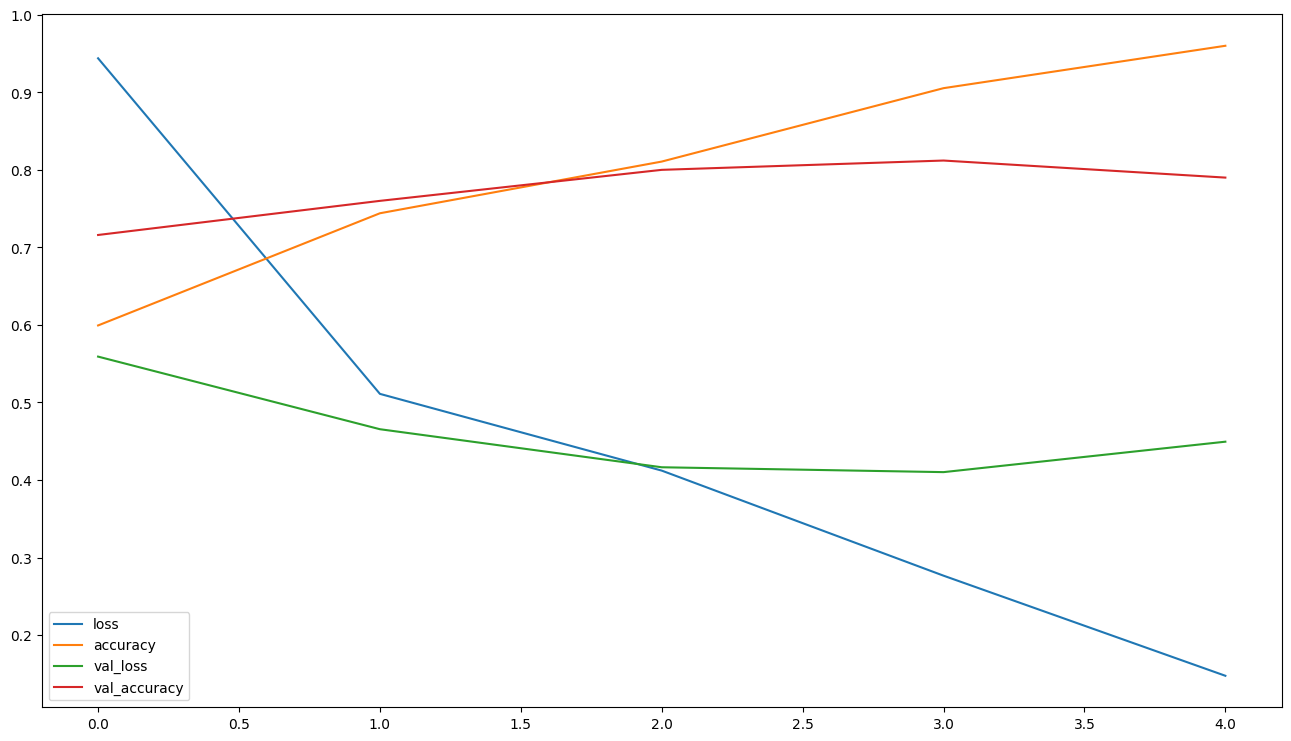

In [19]:
# Plot the loss curves
import pandas as pd
pd.DataFrame(history_baseline.history).plot(figsize=(16, 9))


In [20]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

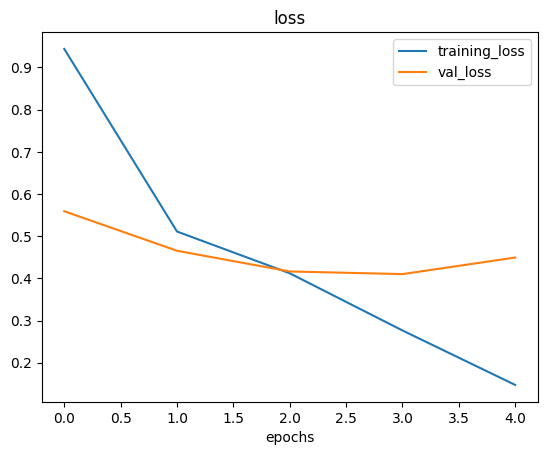

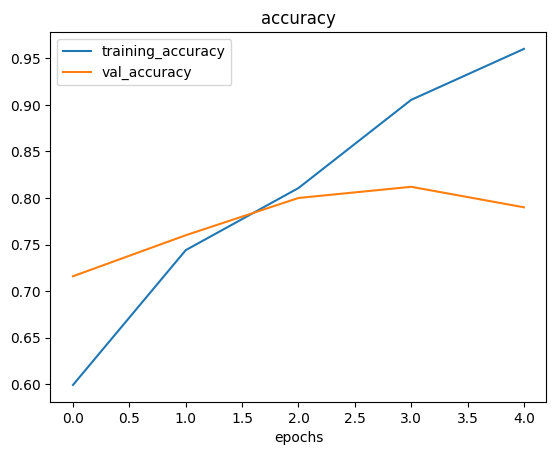

In [21]:
# Check out loss and accuracy
plot_loss_curves(history_baseline)

The validation accuracy is falling over time, even though the training accuracy nears 100%. This means the model is overfitting.

In [22]:
model_baseline_new = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile
model_baseline_new.compile(loss="binary_crossentropy",
                       optimizer=Adam(),
                       metrics=["accuracy"])
model_baseline_new.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [23]:
# Fit new model
history_baseline_new = model_baseline_new.fit(train_data,
                                      epochs=5,
                                      steps_per_epoch=len(train_data),
                                      validation_data=test_data,
                                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 72s 2s/step - loss: 0.6716 - accuracy: 0.6053 - val_loss: 0.5564 - val_accuracy: 0.7020
Epoch 2/5
47/47 [==============================] - 74s 2s/step - loss: 0.4920 - accuracy: 0.7620 - val_loss: 0.3976 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 70s 1s/step - loss: 0.4097 - accuracy: 0.8080 - val_loss: 0.4168 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 67s 1s/step - loss: 0.4106 - accuracy: 0.8307 - val_loss: 0.3345 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 70s 1s/step - loss: 0.3838 - accuracy: 0.8373 - val_loss: 0.3626 - val_accuracy: 0.8520


## Data augmentation to reduce overfitting

Data augmentation allows us to generate more samples by modifying our existing data (by rotating, shearing, scaling, changing colours, etc.)

In [24]:
# Create ImageDataGenerator training instance with augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                                rotation_range=45,
                                                shear_range=0.1,
                                                zoom_range=0.4,
                                                width_shift_range=0.1,
                                                height_shift_range=0.1,
                                                horizontal_flip=True)

# Create ImageDataGenerator without augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data aug for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True)

# Create non-augmented train data
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=True)

# Create non-augmented test data batches
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Visualizing the data

In [26]:
# Get sample data batches
images, labels = train_data.next()
aug_images, aug_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

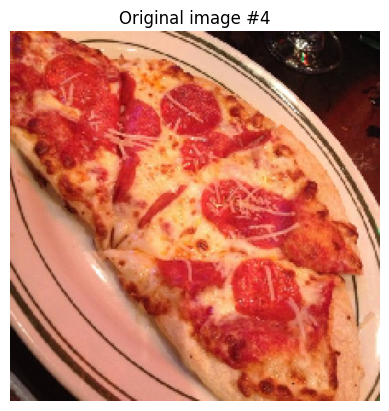

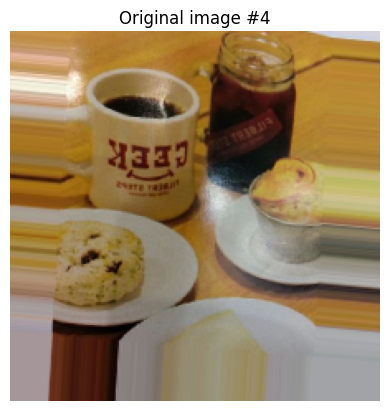

In [27]:
# Show original along with augmented (this is why we didn't shuffle)
import random
random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.title(f"Original image #{random_number}")
plt.axis(False)
plt.figure()
plt.imshow(aug_images[random_number])
plt.title(f"Original image #{random_number}")
plt.axis(False)

In [28]:
# Create a model with augmented data
model_augmented = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_augmented.compile(loss="binary_crossentropy",
                        optimizer=Adam(learning_rate=0.001),
                        metrics=["accuracy"])

history_augmented = model_augmented.fit(train_data_augmented,
                                        epochs=3,
                                        steps_per_epoch=len(train_data_augmented),
                                        validation_data=test_data,
                                        validation_steps=len(test_data))

Epoch 1/3
47/47 [==============================] - 84s 2s/step - loss: 0.6313 - accuracy: 0.6333 - val_loss: 0.5003 - val_accuracy: 0.7760
Epoch 2/3
47/47 [==============================] - 86s 2s/step - loss: 0.5274 - accuracy: 0.7407 - val_loss: 0.3940 - val_accuracy: 0.8400
Epoch 3/3
47/47 [==============================] - 85s 2s/step - loss: 0.4897 - accuracy: 0.7733 - val_loss: 0.3674 - val_accuracy: 0.8360


Shuffled data allows much faster learning.

--2023-05-20 01:58:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-05-20 01:58:41 (32.5 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

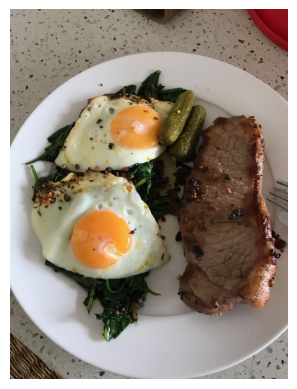

In [30]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

## Preprocess custom data:
We need to preprocess the images into the same format that our neural network has been trained with.

In [31]:
steak.shape

(4032, 3024, 3)

In [35]:
expanded_steak = tf.expand_dims(steak, axis=0)

In [37]:
def load_and_prep_image(filename, img_shape=224):
  # Read in the image
  img = tf.io.read_file(filename=filename)
  # Decode the file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image's values
  img = img/255.
  return img

In [38]:
# Load in and preprocess the image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [44]:
pred = model_baseline_new.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 40ms/step


In [42]:
model_augmented.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 134ms/step


array([[0.77004236]], dtype=float32)

In [46]:
class_names = ['pizza', 'steak']
pred_class = class_names[int(tf.round(pred))]
pred_class


'steak'

In [68]:
def pred_and_plot(model, filename, class_names=class_names):
  # Import target image and preprocess
  img = load_and_prep_image(filename)

  # Make prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}, Steak: {pred[0][0] * 100:.1f}% | Pizza: {(1 - pred[0][0]) * 100:.1f}%")
  plt.axis(False)

1/1 [==============================] - 0s 31ms/step


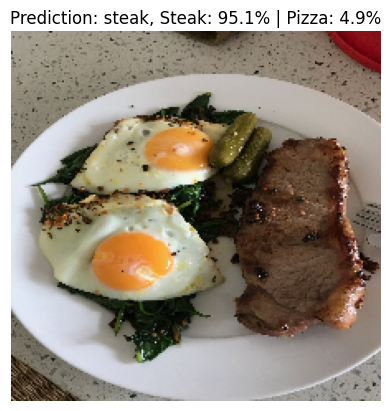

In [69]:
pred_and_plot(model_baseline_new, '03-steak.jpeg')

--2023-05-20 02:49:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.3’

03-pizza-dad.jpeg.3 100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2023-05-20 02:49:19 (35.9 MB/s) - ‘03-pizza-dad.jpeg.3’ saved [2874848/2874848]

1/1 [==============================] - 0s 77ms/step


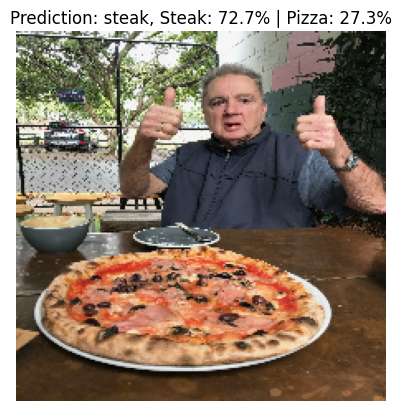

In [71]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_baseline_new, "03-pizza-dad.jpeg")

1/1 [==============================] - 0s 52ms/step


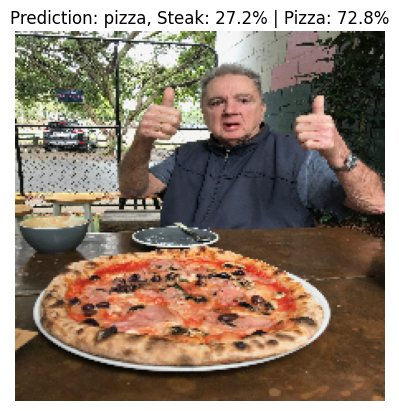

In [72]:
pred_and_plot(model_augmented, "03-pizza-dad.jpeg")